In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB, GaussianNB

%matplotlib inline

In [2]:
# import the amazon review data
df = pd.read_csv("data/amazon_cells_labelled.txt", delimiter="\t", header=None)

In [3]:
df.columns = ["review", "positive"]

In [4]:
df.head()

,review,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


### Feature Engineering

In [5]:
mutable_df = df.copy()

In [6]:
# add features based on positive and negative words

negative_words = ["horrible", "shit", "waste", "problem", "returned", "wasted", "poor quality", "disappointed", "disappoint", "hate", "fix it", "return"]
positive_words = ["great", "amazing", "perfect", "i recommend", "must have", "good", "awesome", "useful", "nice", "excellent"]

target_word_features = negative_words + positive_words

In [7]:
for feature_word in target_word_features:
    mutable_df[str(feature_word)] = mutable_df.review.str.contains(
        " " + str(feature_word) + " ",
        case=False
    )


In [8]:
# make a feature for all-caps as well, as someone writing in all caps could be emphasizing something
mutable_df["allcaps"] = mutable_df.review.str.isupper()

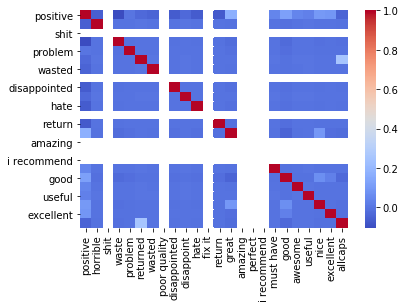

In [9]:
# create a heatmap to see correlated features

sns.heatmap(mutable_df.corr(), cmap="coolwarm")

### Prepare & Create the Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sklearn.linear_model.LogisticRegression

# define our features
features = mutable_df.drop(["positive", "review"], axis=1)
target = mutable_df["positive"]

In [11]:
# define our training & testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=132)

In [12]:
bnb_model = BernoulliNB()

# fit the model to the data
bnb_model.fit(X_train, y_train)

# predict some values to test against
target_predictions = bnb_model.predict(X_test)

# compute the accuracy
accuracy = roc_auc_score(y_test, target_predictions)
print("Model Accuracy: {}".format(accuracy))

Model Accuracy: 0.5466284074605452


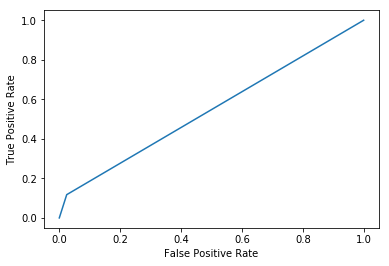

In [13]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, target_predictions)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
_ = plt.plot(false_positive_rate, true_positive_rate, label="data 1, auc="+str(accuracy))

In [20]:
print("Number of mislabeled points out of a total {} points : {}".format(
    X_test.shape[0],
    (y_test != target_predictions).sum()
))

Number of mislabeled points out of a total 150 points : 62
